https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

# Loading Datasets

In [3]:
train_data=pd.read_csv('train_ctrUa4K.csv')
test_data=pd.read_csv('test_lAUu6dG.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Datapreprocessing on Train dataset

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.shape

(614, 13)

In [9]:
train_data['Credit_History'] = train_data['Credit_History'].astype(object)

In [10]:
train_data['Dependents'] = train_data['Dependents'].str.rstrip('+')

In [14]:
train_data['Dependents'] = train_data['Dependents'].astype('int64')

In [12]:
#checking null values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#replacing null values
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Looking Outliers

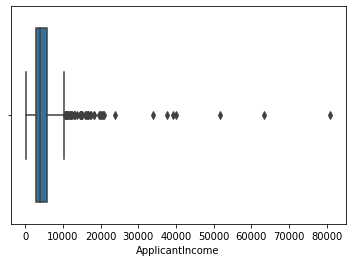

In [15]:
sns.boxplot(train_data['ApplicantIncome'])

In [16]:
train_data['ApplicantIncome'].skew()

6.539513113994625

In [17]:
train_data['ApplicantIncome']=np.log(train_data['ApplicantIncome'])

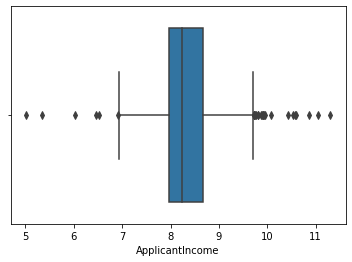

In [18]:
sns.boxplot(train_data['ApplicantIncome'])

In [19]:
percentile25 = train_data['ApplicantIncome'].quantile(0.25)
percentile75 = train_data['ApplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
# train_data[train_data['ApplicantIncome'] >upper_limit]
#train_data[train_data['ApplicantIncome'] <lower_limit]

In [20]:
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']>upper_limit,train_data['ApplicantIncome'].mode(),train_data['ApplicantIncome'])
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']<lower_limit,train_data['ApplicantIncome'].mode(),train_data['ApplicantIncome'])

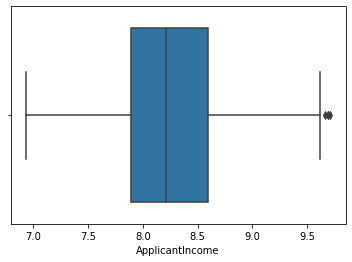

In [21]:
sns.boxplot(train_data['ApplicantIncome'])

In [22]:
percentile25 = train_data['ApplicantIncome'].quantile(0.25)
percentile75 = train_data['ApplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
train_data[train_data['ApplicantIncome'] >upper_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
254,LP001844,Male,No,0,Graduate,Yes,9.695848,0.0,192.0,360.0,0.0,Urban,N
370,LP002194,Female,No,0,Graduate,Yes,9.665167,0.0,55.0,360.0,1.0,Semiurban,Y
475,LP002527,Male,Yes,2,Graduate,Yes,9.712630,1014.0,150.0,360.0,1.0,Rural,Y
594,LP002938,Male,Yes,0,Graduate,Yes,9.687816,0.0,260.0,360.0,1.0,Urban,Y


In [23]:
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']>upper_limit,train_data['ApplicantIncome'].mode(),train_data['ApplicantIncome'])

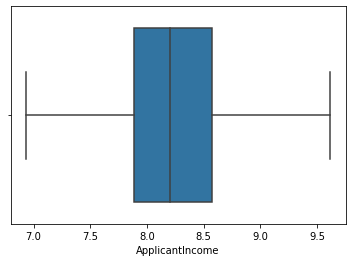

In [24]:
sns.boxplot(train_data['ApplicantIncome'])

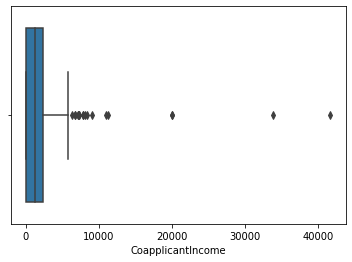

In [25]:
sns.boxplot(train_data['CoapplicantIncome'])

In [26]:
percentile25 = train_data['CoapplicantIncome'].quantile(0.25)
percentile75 = train_data['CoapplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#train_data[train_data['CoapplicantIncome'] > upper_limit]

In [27]:
train_data['CoapplicantIncome']=np.where(train_data['CoapplicantIncome']>upper_limit,train_data['CoapplicantIncome'].median(),train_data['CoapplicantIncome'])

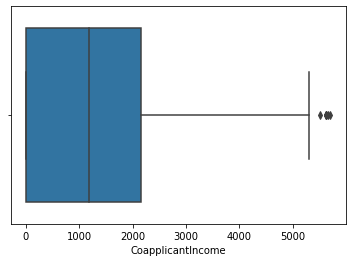

In [28]:
sns.boxplot(train_data['CoapplicantIncome'])

In [29]:
percentile25 = train_data['CoapplicantIncome'].quantile(0.25)
percentile75 = train_data['CoapplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
train_data[train_data['CoapplicantIncome'] > upper_limit]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
21,LP001046,Male,Yes,1,Graduate,No,8.691986,5625.0,315.0,360.0,1.0,Urban,Y
91,LP001318,Male,Yes,2,Graduate,No,8.740337,5654.0,188.0,180.0,1.0,Semiurban,Y
159,LP001552,Male,Yes,0,Graduate,No,8.430109,5625.0,255.0,360.0,1.0,Semiurban,Y
173,LP001594,Male,Yes,0,Graduate,No,8.649624,5625.0,187.0,360.0,1.0,Semiurban,Y
242,LP001806,Male,No,0,Graduate,No,7.994632,5701.0,155.0,60.0,1.0,Urban,Y
502,LP002615,Male,Yes,2,Graduate,No,8.489822,5624.0,208.0,360.0,1.0,Semiurban,Y
530,LP002717,Male,Yes,0,Graduate,No,6.932448,5500.0,216.0,360.0,1.0,Rural,Y


In [30]:
train_data['CoapplicantIncome']=np.where(train_data['CoapplicantIncome']>upper_limit,train_data['CoapplicantIncome'].median(),train_data['CoapplicantIncome'])

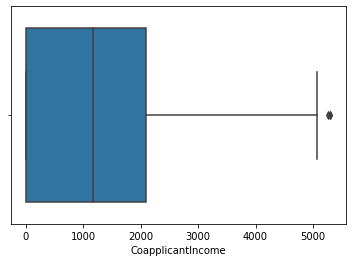

In [31]:
sns.boxplot(train_data['CoapplicantIncome'])

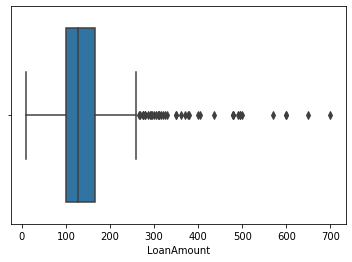

In [32]:
sns.boxplot(train_data['LoanAmount'])

In [33]:
percentile25 = train_data['LoanAmount'].quantile(0.25)
percentile75 = train_data['LoanAmount'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#train_data[train_data['LoanAmount'] > upper_limit]

In [34]:
train_data['LoanAmount']=np.where(train_data['LoanAmount']>upper_limit,train_data['LoanAmount'].median(),train_data['LoanAmount'])

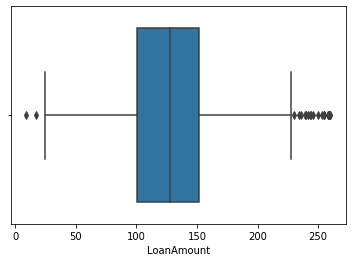

In [35]:
sns.boxplot(train_data['LoanAmount'])

In [36]:
percentile25 = train_data['LoanAmount'].quantile(0.25)
percentile75 = train_data['LoanAmount'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
train_data[train_data['LoanAmount'] > upper_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
65,LP001225,Male,Yes,0,Graduate,No,8.652772,4595.00,258.0,360.0,1.0,Semiurban,N
119,LP001422,Female,No,0,Graduate,No,9.250330,0.00,259.0,360.0,1.0,Urban,Y
138,LP001492,Male,No,0,Graduate,No,9.615739,0.00,242.0,360.0,0.0,Semiurban,N
152,LP001531,Male,No,0,Graduate,No,9.123256,0.00,244.0,360.0,1.0,Urban,N
159,LP001552,Male,Yes,0,Graduate,No,8.430109,1177.75,255.0,360.0,1.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,7.824046,0.00,260.0,360.0,1.0,Semiurban,N
212,LP001713,Male,Yes,1,Graduate,Yes,8.960211,0.00,240.0,360.0,1.0,Urban,Y
236,LP001786,Male,Yes,0,Graduate,No,8.656259,0.00,255.0,360.0,1.0,Urban,N
255,LP001846,Female,No,3,Graduate,No,8.033658,0.00,255.0,360.0,1.0,Rural,Y
348,LP002137,Male,Yes,0,Graduate,No,8.753529,4583.00,259.0,360.0,1.0,Semiurban,Y


In [37]:
train_data['LoanAmount']=np.where(train_data['LoanAmount']>upper_limit,train_data['LoanAmount'].median(),train_data['LoanAmount'])

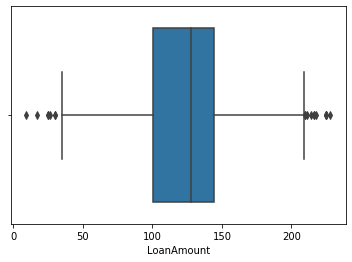

In [38]:
sns.boxplot(train_data['LoanAmount'])

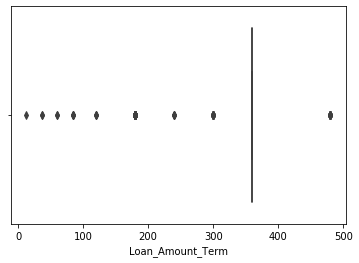

In [39]:
sns.boxplot(train_data['Loan_Amount_Term'])

In [40]:
percentile25 = train_data['Loan_Amount_Term'].quantile(0.25)
percentile75 = train_data['Loan_Amount_Term'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
# train_data[train_data['Loan_Amount_Term'] > upper_limit]
# train_data[train_data['CoapplicantIncome'] < lower_limit]

In [41]:
train_data['Loan_Amount_Term']=np.where(train_data['Loan_Amount_Term']>upper_limit,train_data['Loan_Amount_Term'].median(),train_data['Loan_Amount_Term'])
train_data['Loan_Amount_Term']=np.where(train_data['Loan_Amount_Term']<lower_limit,train_data['Loan_Amount_Term'].median(),train_data['Loan_Amount_Term'])

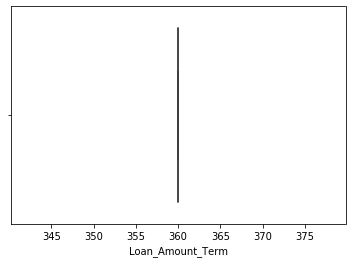

In [42]:
sns.boxplot(train_data['Loan_Amount_Term'])

In [43]:
train_data=train_data.drop('Loan_ID',axis=1)

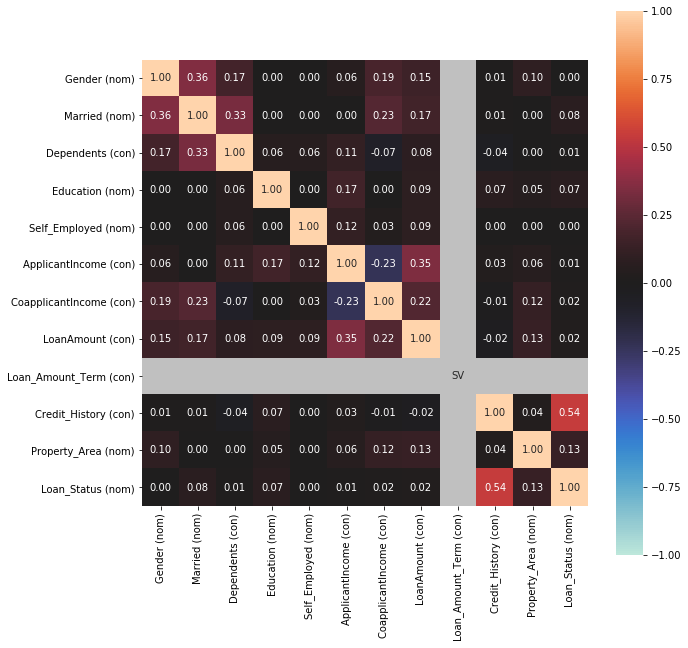

In [44]:
from dython.nominal import associations
associations(train_data,figsize=(10,10),mark_columns=True);

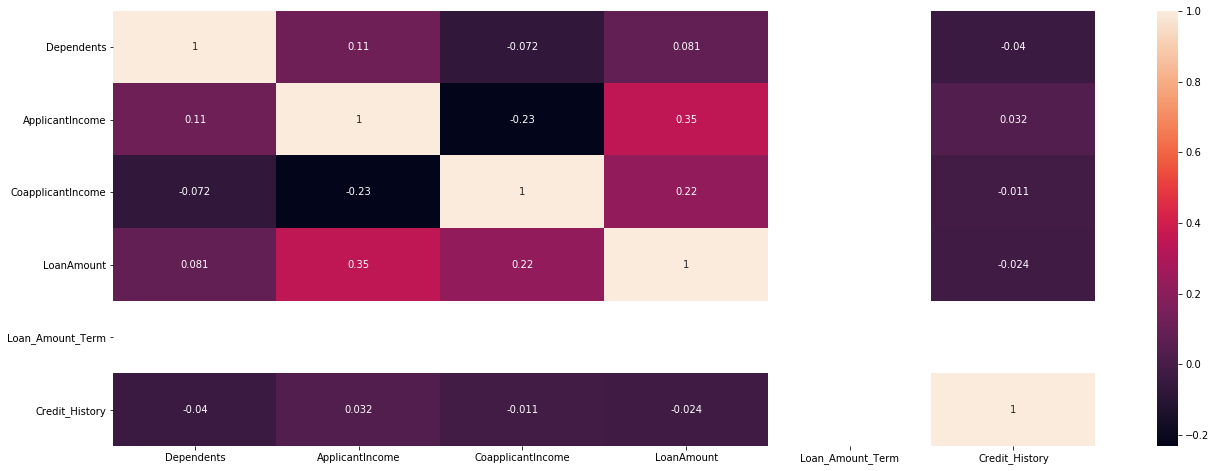

In [45]:
plt.figure(figsize = (22,8))
sns.heatmap(train_data.corr(), annot =True)

# Changing Categorical Variable

In [46]:
train_data = pd.get_dummies(train_data, columns = ['Married','Gender','Self_Employed','Credit_History'],drop_first=True)


In [47]:
labelEncoder = LabelEncoder()
train_data['Dependents']=labelEncoder.fit_transform(train_data['Dependents'])
train_data['Education']=labelEncoder.fit_transform(train_data['Education'])
train_data['Property_Area']=labelEncoder.fit_transform(train_data['Property_Area'])
labelEncoder = LabelEncoder()
train_data['Loan_Status'] = labelEncoder.fit_transform(train_data['Loan_Status'])

In [48]:
#converting target variable
train_data['Loan_Status'] = labelEncoder.fit_transform(train_data['Loan_Status'])

In [49]:
#scaling train dataset
from sklearn.preprocessing import RobustScaler
train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = RobustScaler().fit_transform(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [50]:
train_data.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Married_Yes,Gender_Male,Self_Employed_Yes,Credit_History_1.0
0,0,0,0.685184,-0.559139,0.000000,0.0,2,1,0,1,0,1
1,1,0,0.333118,0.160069,0.000000,0.0,0,0,1,1,0,1
2,0,0,-0.278505,-0.559139,-1.417143,0.0,2,1,1,1,1,1
3,0,1,-0.494523,0.565458,-0.182857,0.0,2,1,1,1,0,1
4,0,0,0.721974,-0.559139,0.297143,0.0,2,1,0,1,0,1


# Datapreprocessing on test dataset

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [52]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [53]:
test_data.shape

(367, 12)

In [54]:
test_data['Credit_History'] = test_data['Credit_History'].astype(object)
test_data['Dependents'] = test_data['Dependents'].str.rstrip('+')


In [55]:
train_data['Dependents'] = train_data['Dependents'].astype('int64')

In [56]:
#checking null values
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
#replacing null values
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Looking outliers

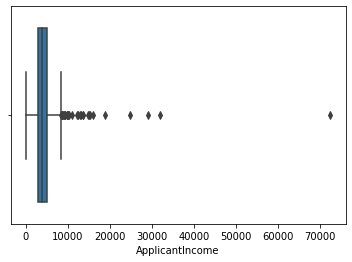

In [58]:
sns.boxplot(test_data['ApplicantIncome'])

In [59]:
percentile25 = test_data['ApplicantIncome'].quantile(0.25)
percentile75 = test_data['ApplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#test_data[test_data['ApplicantIncome'] >upper_limit]
#test_data[test_data['ApplicantIncome'] <lower_limit]

In [60]:
# test_data['ApplicantIncome']=np.where(test_data['ApplicantIncome']>upper_limit,test_data['ApplicantIncome'].mode(),test_data['ApplicantIncome'])
# test_data['ApplicantIncome']=np.where(test_data['ApplicantIncome']<lower_limit,test_data['ApplicantIncome'].mode(),test_data['ApplicantIncome'])

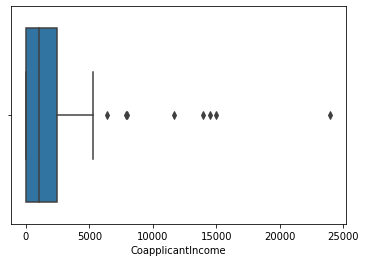

In [61]:
sns.boxplot(test_data['CoapplicantIncome'])

In [62]:
percentile25 = test_data['CoapplicantIncome'].quantile(0.25)
percentile75 = test_data['CoapplicantIncome'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#test_data[test_data['CoapplicantIncome'] > upper_limit]

In [63]:
test_data['CoapplicantIncome']=np.where(test_data['CoapplicantIncome']>upper_limit,test_data['CoapplicantIncome'].median(),test_data['CoapplicantIncome'])

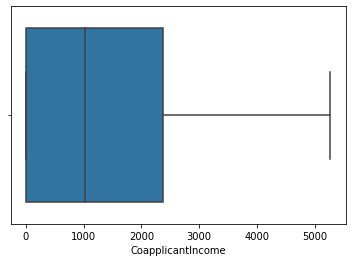

In [64]:
sns.boxplot(test_data['CoapplicantIncome'])

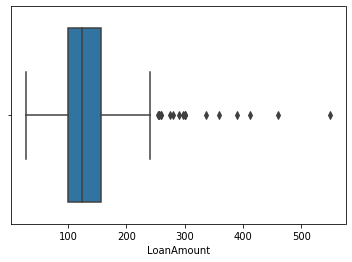

In [65]:
sns.boxplot(test_data['LoanAmount'])

In [66]:
percentile25 = test_data['LoanAmount'].quantile(0.25)
percentile75 = test_data['LoanAmount'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#test_data[test_data['LoanAmount'] > upper_limit]

In [67]:
test_data['LoanAmount']=np.where(test_data['LoanAmount']>upper_limit,test_data['LoanAmount'].median(),test_data['LoanAmount'])

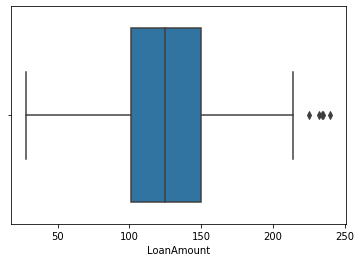

In [68]:
sns.boxplot(test_data['LoanAmount'])

In [69]:
percentile25 = test_data['LoanAmount'].quantile(0.25)
percentile75 = test_data['LoanAmount'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#test_data[test_data['LoanAmount'] > upper_limit]

In [70]:
test_data['LoanAmount']=np.where(test_data['LoanAmount']>upper_limit,test_data['LoanAmount'].median(),test_data['LoanAmount'])

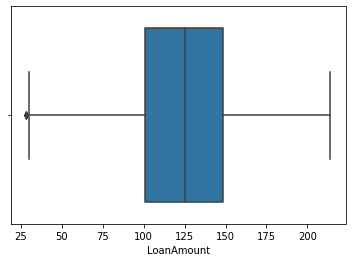

In [71]:
sns.boxplot(test_data['LoanAmount'])

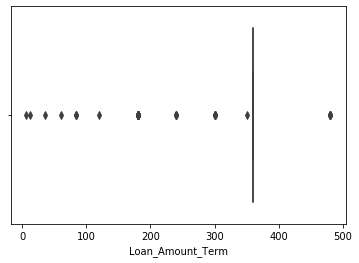

In [72]:
sns.boxplot(test_data['Loan_Amount_Term'])

In [73]:
percentile25 = test_data['Loan_Amount_Term'].quantile(0.25)
percentile75 = test_data['Loan_Amount_Term'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
# test_data[test_data['Loan_Amount_Term'] > upper_limit]
# test_data[test_data['CoapplicantIncome'] < lower_limit]

In [74]:
test_data['Loan_Amount_Term']=np.where(test_data['Loan_Amount_Term']>upper_limit,test_data['Loan_Amount_Term'].median(),test_data['Loan_Amount_Term'])
test_data['Loan_Amount_Term']=np.where(test_data['Loan_Amount_Term']<lower_limit,test_data['Loan_Amount_Term'].median(),test_data['Loan_Amount_Term'])

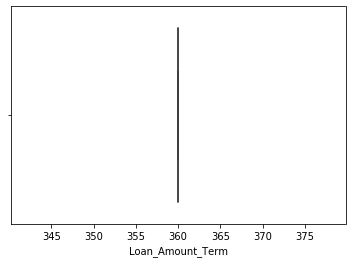

In [75]:
sns.boxplot(test_data['Loan_Amount_Term'])

# Changing Categorical Data

In [76]:
test_data = pd.get_dummies(test_data, columns = ['Married','Gender','Self_Employed','Credit_History'],drop_first=True)


In [77]:
labelEncoder = LabelEncoder()
test_data['Dependents']=labelEncoder.fit_transform(test_data['Dependents'])
test_data['Education']=labelEncoder.fit_transform(test_data['Education'])
test_data['Property_Area']=labelEncoder.fit_transform(test_data['Property_Area'])

In [78]:
#scaling train dataset
from sklearn.preprocessing import RobustScaler
test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] =RobustScaler().fit_transform(test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [79]:
#test_data=test_data.drop('Loan_ID',axis=1)

In [80]:
test_data

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Married_Yes,Gender_Male,Self_Employed_Yes,Credit_History_1.0
0,LP001015,0,0,0.880692,-0.432763,-0.315789,0.0,2,1,1,0,1
1,LP001022,1,0,-0.323315,0.200549,0.021053,0.0,2,1,1,0,1
2,LP001031,2,0,0.552823,0.327211,1.747368,0.0,2,1,1,0,1
3,LP001035,2,0,-0.658470,0.642179,-0.526316,0.0,2,1,1,0,1
4,LP001051,0,1,-0.232240,-0.432763,-0.989474,0.0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,3,1,0.101548,0.317501,-0.252632,0.0,2,1,1,1,1
363,LP002975,0,0,0.169399,-0.133418,-0.210526,0.0,2,1,1,0,1
364,LP002980,0,0,-0.244080,0.408697,0.021053,0.0,1,0,1,0,1
365,LP002986,0,0,0.552823,0.577581,0.694737,0.0,0,1,1,0,1


# Validation

In [81]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['Loan_Status'],axis=1)
y=train_data['Loan_Status']

In [82]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234,shuffle=True)

In [83]:
X_train.shape

(429, 11)

In [84]:
y_train.shape

(429,)

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = classifier.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 27  31]
 [  0 127]]


0.8324324324324325

# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
y_pred = classifier.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 18  40]
 [  6 121]]


0.7513513513513513

# SVM

In [108]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(x_test)

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(cm)
accuracy_score(y_test, y_pred)

[[ 27  31]
 [  0 127]]


0.8324324324324325

# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [111]:
y_pred = classifier.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30 28]
 [32 95]]


0.6756756756756757

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
y_pred = classifier.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 27  31]
 [  0 127]]


0.8324324324324325

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
y_pred = classifier.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 28  30]
 [  4 123]]


0.8162162162162162

# submission

In [85]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_ID'] = test_data['Loan_ID']

In [86]:
test_data=test_data.drop('Loan_ID',axis=1)

In [98]:
pred = classifier.predict(test_data)

In [99]:
submission['Loan_Status']=pred

In [100]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [101]:
submission.to_csv('naivebayes.csv',index=False)